In [2]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint
import matplotlib.pyplot as plt
import sklearn
import xgboost as xgb
import pandas as pd
import numpy as np

# Step 1: Read the dataset:
Train = pd.read_csv('Original_data/Train_Set.csv')
Test = pd.read_csv("Original_data/Test_Set.csv")
X_train = Train.iloc[:,0:-1]
X_test = Test.iloc[:,0:-1]
y_train = Train.iloc[:,-1]
le = LabelEncoder().fit(y = y_train)
y_train = le.transform(y_train)
y_test = Test.iloc[:,-1]

In [3]:
# Perform PCA to reduce dimensionallity:
from sklearn.decomposition import PCA
#print(X_train.info())
pca = PCA()
pca.fit(X_train)
pca.components_.shape


(350, 350)

,PCA_components,Cumulative_Explained_Variance
0,1,0.711891
1,2,0.910164
2,3,0.956422
3,4,0.973484
4,5,0.983642
5,6,0.988799
6,7,0.993496
7,8,0.994994
8,9,0.996226
9,10,0.997084


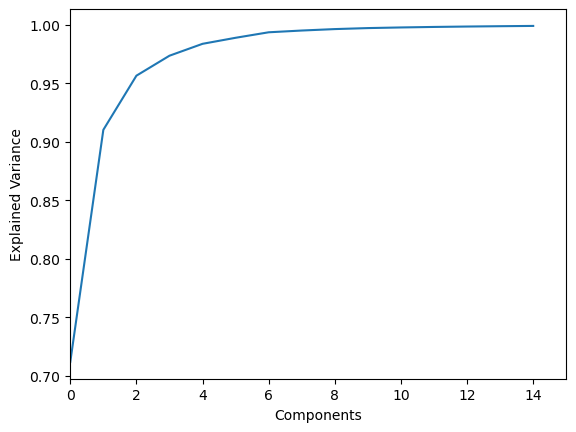

In [4]:
PCA_cumsum = np.cumsum(pca.explained_variance_ratio_[:15])
plt.plot(PCA_cumsum)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.xlim((0, 15))


data = {'PCA_components': np.arange(1, 16), 'Cumulative_Explained_Variance': PCA_cumsum}
df = pd.DataFrame(data)
df

In [8]:
d15_pca_train = pd.DataFrame(pca.transform(X_train)).iloc[:,:55]
d15_pca_test = pd.DataFrame(pca.transform(X_test)).iloc[:,:55]
d15_pca_train

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.893531,-0.044978,-0.133466,-0.036199,0.100259,-0.006307,0.028890,0.007122,-0.007018,0.003584,...,-0.000582,-0.001126,0.000252,-0.001371,-0.000063,-0.000265,-0.000752,0.000219,0.000789,-0.000227
1,-0.529616,0.325917,-0.067865,0.054931,-0.094707,-0.036231,0.074709,-0.005698,-0.013268,-0.024761,...,0.002502,0.001523,0.000400,-0.004886,-0.001820,-0.001258,0.001026,-0.000429,0.001285,-0.000689
2,-0.334418,0.015271,-0.090853,0.045903,-0.061977,-0.006851,0.010291,-0.013193,-0.013170,-0.010820,...,0.000172,0.001935,0.000096,-0.000421,-0.001021,-0.000499,0.000863,0.001365,0.000062,0.001294
3,-0.308513,-0.159026,0.001403,-0.049148,0.004170,0.054334,-0.085552,-0.014665,0.011964,0.015350,...,-0.000269,-0.000493,0.000851,0.001386,-0.000930,0.001420,0.000416,0.001412,0.001059,0.001494
4,0.002970,-0.191756,-0.001492,-0.088070,-0.018569,0.022930,0.041992,-0.011382,0.034605,0.008467,...,0.001355,0.000559,-0.002199,-0.000600,-0.000353,-0.000075,0.000569,-0.001983,0.000552,-0.000818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,-0.073585,-0.150482,0.010791,-0.035463,-0.046376,0.012064,0.004826,-0.016991,-0.004679,-0.000926,...,-0.000536,-0.001097,0.000074,-0.000364,0.000624,0.000211,0.001053,-0.001430,0.000501,-0.000908
2189,-0.057841,-0.174749,0.025072,-0.048406,-0.041376,0.015805,0.009601,-0.018239,-0.008925,-0.001227,...,-0.000833,-0.000739,0.000456,0.000947,-0.001870,0.000274,0.000488,-0.002439,0.000472,-0.000108
2190,-0.042397,-0.192567,0.038723,-0.057880,-0.038808,0.017692,0.008299,-0.017953,-0.015778,0.000369,...,-0.001227,-0.000910,0.000466,0.000611,-0.000139,0.000693,0.000482,-0.002533,0.001726,-0.000303
2191,-0.027778,-0.209862,0.052389,-0.068371,-0.036179,0.020823,0.008005,-0.017572,-0.021874,-0.000831,...,-0.000129,-0.001098,0.001115,0.000886,-0.000160,-0.000342,0.001477,-0.002214,-0.001777,0.000139


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = d15_pca_train[:,:15].corr()



#Mask:
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)]=True

#plot heat map
plt.figure(figsize=(15,15))
g=sns.heatmap(corrmat,
              vmax = 1, vmin = 1,
              annot=True,
              mask = mask,
              cmap="RdYlGn")

KeyError: (slice(None, None, None), slice(None, 15, None))

In [31]:
# Step 3: Instantiate XGBoost Classifier
model_PCA = xgb.XGBClassifier(
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'multi: softmax',
 num_class = 5,
 learning_rate = 0.05,
 max_depth = 4,
 seed=27)

# Step 4: Fit the model
model_PCA.fit(d15_pca_train, y_train)
predictions = model_PCA.predict(d15_pca_test)
predictions=le.inverse_transform(predictions)
Test['Predictions'] = predictions
Test[1:5]

Test['Correct_prediction'] = Test['class_label'] == Test['Predictions']
print(f"Mean amount of correct predictions: {Test['Correct_prediction'].mean()}")

Mean amount of correct predictions: 0.6199226305609284


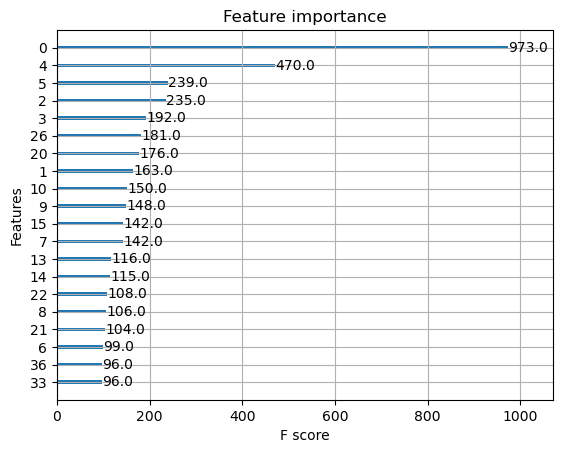

In [32]:
xgb.plot_importance(model_PCA,max_num_features=20)
plt.show()